<a href="https://colab.research.google.com/github/hscrown/seoul_pr/blob/main/collaborative_filtering_%EC%97%B0%EC%8A%B5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 현석이의 영화 평점 예상하기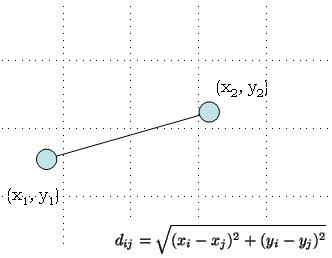




협업필터링에는 유저기반 협업필터링과 아이템기반 협업필터링이 존재하는데,, 여기서는 유저기반 협업필터링을 연습한다.

참고링크:https://kutar37.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%98%91%EC%97%85%ED%95%84%ED%84%B0%EB%A7%81Collaborative-Filtering-%EC%B6%94%EC%B2%9C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-1





# Data

| Name | Guardians of the Galaxy 2 | Christmas in August | Boss Baby |
|------|---------------------------|---------------------|-----------|
| hermione  | 5                         | 4                   | 1.5       |
| chris  | -                         | 5                   | 2         |
| harry | 2.5                       | 2                   | 1         |
| molly  | 3.5                       | 4                   | 5         |


크리스의 가디언즈 평점을 예상해보자.

In [2]:
# 이중 딕셔너리 구조로 데이터를 만들어준다.
critics={
     'hermione':{'guardians of the galaxy 2':5,'christmas in august':4,'boss baby':1.5},
     'chris':{'christmas in august':5,'boss baby':2},
     'harry':{'guardians of the galaxy 2':2.5,'christmas in august':2,'boss baby':1},
     'molly':{'guardians of the galaxy 2':3.5,'christmas in august':4,'boss baby':5}
}


# 헤르미온느의 영화평점

In [6]:
# 헤르미온느의 영화평점 가져오기
critics.get( 'hermione' ) # 존재하지 않는 키로 가져오면 None 출력
# 또는
critics['hermione'] # 존재하지 않는 키로 가져오면 오류 발생.

# 오류가 안 발생했으면 좋겠으니까 get함수를 쓰기로한다.

{'guardians of the galaxy 2': 5, 'christmas in august': 4, 'boss baby': 1.5}

In [7]:
# 이중 딕셔너리니까 get함수를 두번써서 헤르미온느의 보스베이비 평점을 보자
critics.get('hermione').get('boss baby')

1.5

# 2차원에서 피타고라스 공식을 이용해 두사람간 거리 구하기
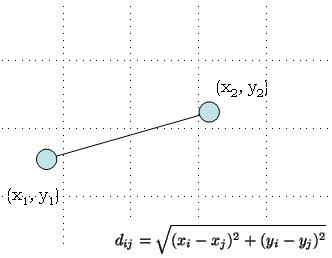[두 좌표가 잇을때 피타고라스 공식](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9976F3335A003D9605)

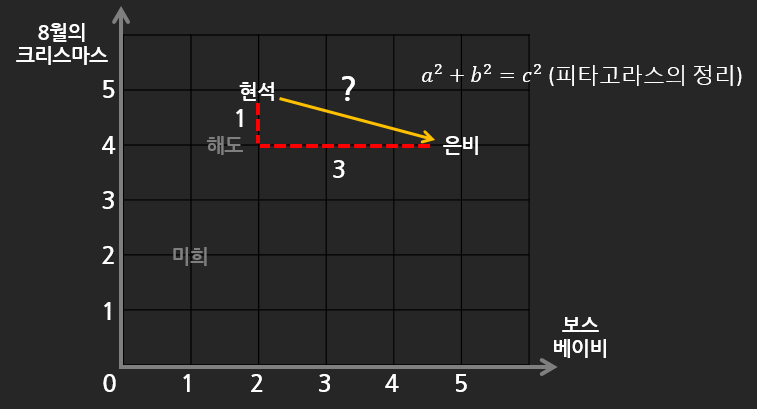

In [11]:
# 크리스와 몰리의 거리 구하기

# 피타고라스 함수 정의
from math import sqrt

def sim(i,j):
    return sqrt(pow(i,2) + pow(j,2))


In [12]:
var1= critics['chris']['christmas in august']-critics['molly']['christmas in august']
var2= critics['chris']['boss baby']-critics['molly']['boss baby']

sim(var1,var2)

3.1622776601683795

# 2차원에서 피타고라스 공식을 통해 2명 이상과의 거리 구하기

그럼 이제 chs을 대상으로 다른 사람들 전체와의 christmas in august, boss baby 평점을 통해 거리를 구해보자.

In [13]:
# 반복문을 통해 key값으로 다른 사람들 값을 꺼내오기

for i in critics:
  if i!='chris':
    num1=critics['chris']['christmas in august']-critics[i]['christmas in august']
    num2=critics['chris']['boss baby']-critics[i]['boss baby']
    print(i,sim(num1,num2))

    # 값이 작을수록 가까움, 값이 작을 수록 유사함. # 크리스는 헤르미온느랑 가장 유사한 취향

hermione 1.118033988749895
harry 3.1622776601683795
molly 3.1622776601683795


# 비교를 위한 정규화(변수재설정)

정규화(normalization)을 이용해 값이 클수록 유사한 것으로 변경한다. 정규화를 하면 변수의 범위가 0~1사이로 일정하게 된다. 그리고 유사도라고하면 값이 클수록 유사해야 할 것 같잖아.

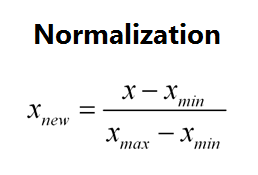

In [14]:
# 정규화
for i in critics:
  if i != 'chris':
    num1=critics['chris']['christmas in august']-critics[i]['christmas in august']
    num2=critics['chris']['boss baby']-critics[i]['boss baby']
    print(i,1/(1+sim(num1,num2)))

hermione 0.4721359549995794
harry 0.2402530733520421
molly 0.2402530733520421
